In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/expedia-personalized-sort/randomBenchmark.zip
/kaggle/input/expedia-personalized-sort/data.zip
/kaggle/input/expedia-personalized-sort/basicPythonBenchmark.zip
/kaggle/input/expedia-personalized-sort/testOrderBenchmark.zip


In [2]:
from zipfile import ZipFile 
!unzip ../input/expedia-personalized-sort/data


Archive:  ../input/expedia-personalized-sort/data.zip
  inflating: test.csv                
  inflating: train.csv               


In [3]:
df_train = pd.read_csv('train.csv',delimiter=',')

In [4]:
df_train.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [5]:
df_train.shape

(9917530, 54)

In [6]:
df_train.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [7]:
df_train.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        9412233
visitor_hist_adr_usd           9409918
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                14630
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           2178380
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      9281966
orig_destination_distance

In [8]:
df_train.info

<bound method DataFrame.info of          srch_id            date_time  site_id  visitor_location_country_id  \
0              1  2013-04-04 08:32:15       12                          187   
1              1  2013-04-04 08:32:15       12                          187   
2              1  2013-04-04 08:32:15       12                          187   
3              1  2013-04-04 08:32:15       12                          187   
4              1  2013-04-04 08:32:15       12                          187   
...          ...                  ...      ...                          ...   
9917525   665574  2013-05-21 11:06:37       24                          216   
9917526   665574  2013-05-21 11:06:37       24                          216   
9917527   665574  2013-05-21 11:06:37       24                          216   
9917528   665574  2013-05-21 11:06:37       24                          216   
9917529   665574  2013-05-21 11:06:37       24                          216   

         visitor_hi

In [9]:
df_train.describe

<bound method NDFrame.describe of          srch_id            date_time  site_id  visitor_location_country_id  \
0              1  2013-04-04 08:32:15       12                          187   
1              1  2013-04-04 08:32:15       12                          187   
2              1  2013-04-04 08:32:15       12                          187   
3              1  2013-04-04 08:32:15       12                          187   
4              1  2013-04-04 08:32:15       12                          187   
...          ...                  ...      ...                          ...   
9917525   665574  2013-05-21 11:06:37       24                          216   
9917526   665574  2013-05-21 11:06:37       24                          216   
9917527   665574  2013-05-21 11:06:37       24                          216   
9917528   665574  2013-05-21 11:06:37       24                          216   
9917529   665574  2013-05-21 11:06:37       24                          216   

         visitor_

In [10]:
df_train['visitor_hist_adr_usd'].unique()

array([   nan, 180.75, 270.08, ..., 246.58, 193.6 , 278.06])

In [11]:
df_train['visitor_hist_starrating'].unique()

array([ nan, 4.31, 2.5 , 3.74, 3.35, 3.89, 3.38, 3.5 , 5.  , 2.57, 2.3 ,
       3.24, 3.26, 3.22, 3.72, 2.9 , 3.69, 3.  , 3.17, 3.75, 3.67, 2.94,
       4.94, 4.  , 4.33, 3.94, 3.92, 2.33, 4.2 , 3.99, 2.6 , 3.37, 3.51,
       2.75, 2.7 , 4.17, 2.63, 3.71, 3.95, 3.52, 2.21, 4.25, 3.59, 3.9 ,
       2.81, 2.67, 3.56, 4.07, 3.8 , 3.05, 2.  , 4.4 , 3.91, 2.72, 2.88,
       2.83, 2.69, 3.43, 3.06, 4.6 , 3.96, 3.49, 2.18, 2.45, 2.62, 4.06,
       4.5 , 3.2 , 2.43, 2.95, 3.1 , 3.28, 2.8 , 3.15, 3.16, 3.09, 3.65,
       2.87, 3.62, 4.11, 3.12, 3.76, 4.63, 3.08, 3.34, 2.31, 4.14, 4.02,
       3.44, 2.68, 3.82, 4.46, 4.3 , 1.67, 4.67, 3.61, 3.53, 4.83, 3.66,
       3.33, 3.97, 4.18, 3.3 , 3.86, 4.23, 3.07, 2.2 , 2.71, 3.7 , 4.75,
       3.4 , 2.56, 3.68, 4.74, 3.46, 4.1 , 3.83, 2.38, 2.42, 2.25, 4.08,
       3.25, 2.64, 2.61, 3.6 , 2.79, 4.12, 4.22, 2.12, 4.09, 3.55, 3.63,
       2.22, 3.98, 2.93, 2.35, 2.28, 3.93, 4.27, 3.13, 3.79, 3.78, 2.77,
       2.96, 4.38, 3.48, 4.05, 4.15, 2.91, 3.29, 4.

In [12]:
drop_list = ['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id','random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv',
       'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv',
       'comp8_rate_percent_diff', 'click_bool', 'gross_bookings_usd',
       'booking_bool']

In [13]:
df_train = df_train.drop(drop_list,axis=1)

In [14]:
df_train

,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance
0,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN
1,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN
2,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN
3,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN
4,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9917525,4,3.5,0,2.48,0.0551,4.53,2,66.07,0,19246,2,7,1,0,1,0,NaN,NaN
9917526,4,3.0,1,2.20,0.3344,4.39,6,67.10,0,19246,2,7,1,0,1,0,NaN,NaN
9917527,4,0.0,0,1.79,NaN,4.64,8,73.91,0,19246,2,7,1,0,1,0,NaN,NaN
9917528,4,0.0,0,2.94,0.0928,4.64,7,66.07,0,19246,2,7,1,0,1,0,NaN,NaN


In [15]:
df_train.shape

(9917530, 18)

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9917530 entries, 0 to 9917529
Data columns (total 18 columns):
prop_starrating              int64
prop_review_score            float64
prop_brand_bool              int64
prop_location_score1         float64
prop_location_score2         float64
prop_log_historical_price    float64
position                     int64
price_usd                    float64
promotion_flag               int64
srch_destination_id          int64
srch_length_of_stay          int64
srch_booking_window          int64
srch_adults_count            int64
srch_children_count          int64
srch_room_count              int64
srch_saturday_night_bool     int64
srch_query_affinity_score    float64
orig_destination_distance    float64
dtypes: float64(7), int64(11)
memory usage: 1.3 GB


In [17]:
df_train.describe()

,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance
count,9.917530e+06,9.902900e+06,9.917530e+06,9.917530e+06,7.739150e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,635564.000000,6.701069e+06
mean,3.181534e+00,3.777702e+00,6.343042e-01,2.875978e+00,1.304190e-01,4.316834e+00,1.686601e+01,2.417825e+02,2.157616e-01,1.405615e+04,2.390011e+00,3.762379e+01,1.972597e+00,3.487331e-01,1.110800e+00,5.002563e-01,-24.302829,1.307018e+03
std,1.050191e+00,1.050806e+00,4.816248e-01,1.532092e+00,1.595145e-01,1.836241e+00,1.042769e+01,1.434181e+04,4.113497e-01,8.115132e+03,2.066758e+00,5.210799e+01,8.590720e-01,7.297288e-01,4.241494e-01,5.000000e-01,15.808004,2.030283e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-326.567500,1.000000e-02
25%,3.000000e+00,3.500000e+00,0.000000e+00,1.790000e+00,1.900000e-02,4.440000e+00,8.000000e+00,8.500000e+01,0.000000e+00,7.100000e+03,1.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-31.085100,1.411200e+02
50%,3.000000e+00,4.000000e+00,1.000000e+00,2.770000e+00,6.910000e-02,4.910000e+00,1.600000e+01,1.220700e+02,0.000000e+00,1.357000e+04,2.000000e+00,1.700000e+01,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-20.514900,3.871800e+02
75%,4.000000e+00,4.500000e+00,1.000000e+00,4.040000e+00,1.806000e-01,5.310000e+00,2.600000e+01,1.850000e+02,0.000000e+00,2.111500e+04,3.000000e+00,4.900000e+01,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-13.405700,1.509030e+03
max,5.000000e+00,5.000000e+00,1.000000e+00,6.980000e+00,1.000000e+00,6.210000e+00,4.000000e+01,1.972633e+07,1.000000e+00,2.841600e+04,5.900000e+01,4.980000e+02,9.000000e+00,9.000000e+00,8.000000e+00,1.000000e+00,-2.494100,1.169298e+04


In [18]:
cols = df_train.loc[: , "prop_location_score1":"prop_location_score2"]
df_train['prop_location_score'] = cols.mean(axis=1)
df_train

,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,prop_location_score
0,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1.43690
1,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1.10745
2,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1.11225
3,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1.42125
4,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1.38205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9917525,4,3.5,0,2.48,0.0551,4.53,2,66.07,0,19246,2,7,1,0,1,0,NaN,NaN,1.26755
9917526,4,3.0,1,2.20,0.3344,4.39,6,67.10,0,19246,2,7,1,0,1,0,NaN,NaN,1.26720
9917527,4,0.0,0,1.79,NaN,4.64,8,73.91,0,19246,2,7,1,0,1,0,NaN,NaN,1.79000
9917528,4,0.0,0,2.94,0.0928,4.64,7,66.07,0,19246,2,7,1,0,1,0,NaN,NaN,1.51640


In [19]:

df_train.head()

,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,prop_location_score
0,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1.43690
1,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1.10745
2,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1.11225
3,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1.42125
4,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1.38205


In [20]:
df_train['promotion_flag'].unique()

array([0, 1])

In [21]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=2)

In [23]:
df_train.isnull().sum()

prop_starrating                    0
prop_review_score              14630
prop_brand_bool                    0
prop_location_score1               0
prop_location_score2         2178380
prop_log_historical_price          0
position                           0
price_usd                          0
promotion_flag                     0
srch_destination_id                0
srch_length_of_stay                0
srch_booking_window                0
srch_adults_count                  0
srch_children_count                0
srch_room_count                    0
srch_saturday_night_bool           0
srch_query_affinity_score    9281966
orig_destination_distance    3216461
prop_location_score                0
dtype: int64

In [24]:
drop_list_again = ['srch_query_affinity_score','orig_destination_distance']
df_analyze = df_train.drop(drop_list_again,axis=1)

In [25]:
df_analyze

,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,prop_location_score
0,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,1.43690
1,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,1.10745
2,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,1.11225
3,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,1.42125
4,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,1.38205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9917525,4,3.5,0,2.48,0.0551,4.53,2,66.07,0,19246,2,7,1,0,1,0,1.26755
9917526,4,3.0,1,2.20,0.3344,4.39,6,67.10,0,19246,2,7,1,0,1,0,1.26720
9917527,4,0.0,0,1.79,NaN,4.64,8,73.91,0,19246,2,7,1,0,1,0,1.79000
9917528,4,0.0,0,2.94,0.0928,4.64,7,66.07,0,19246,2,7,1,0,1,0,1.51640


In [26]:
df_analyze.isnull().sum()

prop_starrating                    0
prop_review_score              14630
prop_brand_bool                    0
prop_location_score1               0
prop_location_score2         2178380
prop_log_historical_price          0
position                           0
price_usd                          0
promotion_flag                     0
srch_destination_id                0
srch_length_of_stay                0
srch_booking_window                0
srch_adults_count                  0
srch_children_count                0
srch_room_count                    0
srch_saturday_night_bool           0
prop_location_score                0
dtype: int64

In [27]:
df_analyze['prop_review_score'].fillna((df_analyze['prop_review_score'].mean()),inplace=True)

In [28]:
df_analyze.isnull().sum()

prop_starrating                    0
prop_review_score                  0
prop_brand_bool                    0
prop_location_score1               0
prop_location_score2         2178380
prop_log_historical_price          0
position                           0
price_usd                          0
promotion_flag                     0
srch_destination_id                0
srch_length_of_stay                0
srch_booking_window                0
srch_adults_count                  0
srch_children_count                0
srch_room_count                    0
srch_saturday_night_bool           0
prop_location_score                0
dtype: int64

In [29]:
df_analyze.head()

,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,prop_location_score
0,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,1.43690
1,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,1.10745
2,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,1.11225
3,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,1.42125
4,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,1.38205


In [30]:
drop_list_new = ['prop_location_score1','prop_location_score2']

In [31]:
df_analyze = df_analyze.drop((df_analyze[drop_list_new]),axis=1)

In [32]:
df_analyze

,prop_starrating,prop_review_score,prop_brand_bool,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,prop_location_score
0,3,3.5,1,4.95,27,104.77,0,23246,1,0,4,0,1,1,1.43690
1,4,4.0,1,5.03,26,170.74,0,23246,1,0,4,0,1,1,1.10745
2,3,4.5,1,4.92,21,179.80,0,23246,1,0,4,0,1,1,1.11225
3,2,4.0,1,4.39,34,602.77,0,23246,1,0,4,0,1,1,1.42125
4,4,3.5,1,4.93,4,143.58,0,23246,1,0,4,0,1,1,1.38205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9917525,4,3.5,0,4.53,2,66.07,0,19246,2,7,1,0,1,0,1.26755
9917526,4,3.0,1,4.39,6,67.10,0,19246,2,7,1,0,1,0,1.26720
9917527,4,0.0,0,4.64,8,73.91,0,19246,2,7,1,0,1,0,1.79000
9917528,4,0.0,0,4.64,7,66.07,0,19246,2,7,1,0,1,0,1.51640


In [33]:
df_analyze.describe()

,prop_starrating,prop_review_score,prop_brand_bool,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,prop_location_score
count,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06,9.917530e+06
mean,3.181534e+00,3.777702e+00,6.343042e-01,4.316834e+00,1.686601e+01,2.417825e+02,2.157616e-01,1.405615e+04,2.390011e+00,3.762379e+01,1.972597e+00,3.487331e-01,1.110800e+00,5.002563e-01,1.735208e+00
std,1.050191e+00,1.050031e+00,4.816248e-01,1.836241e+00,1.042769e+01,1.434181e+04,4.113497e-01,8.115132e+03,2.066758e+00,5.210799e+01,8.590720e-01,7.297288e-01,4.241494e-01,5.000000e-01,1.006556e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,3.500000e+00,0.000000e+00,4.440000e+00,8.000000e+00,8.500000e+01,0.000000e+00,7.100000e+03,1.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.061750e+00
50%,3.000000e+00,4.000000e+00,1.000000e+00,4.910000e+00,1.600000e+01,1.220700e+02,0.000000e+00,1.357000e+04,2.000000e+00,1.700000e+01,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.619200e+00
75%,4.000000e+00,4.500000e+00,1.000000e+00,5.310000e+00,2.600000e+01,1.850000e+02,0.000000e+00,2.111500e+04,3.000000e+00,4.900000e+01,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.300000e+00
max,5.000000e+00,5.000000e+00,1.000000e+00,6.210000e+00,4.000000e+01,1.972633e+07,1.000000e+00,2.841600e+04,5.900000e+01,4.980000e+02,9.000000e+00,9.000000e+00,8.000000e+00,1.000000e+00,6.980000e+00


In [34]:
kmeans.fit(df_analyze)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
kmeans.cluster_centers_

array([[3.18152325e+00, 3.77770066e+00, 6.34305042e-01, 4.31684267e+00,
        1.68660640e+01, 2.09498272e+02, 2.15759582e-01, 1.40561315e+04,
        2.39000908e+00, 3.76237491e+01, 1.97259365e+00, 3.48730107e-01,
        1.11080101e+00, 5.00258736e-01, 1.73520184e+00],
       [4.41666667e+00, 3.97023810e+00, 5.35714286e-01, 3.26785714e+00,
        1.09166667e+01, 3.81187620e+06, 4.52380952e-01, 1.64511190e+04,
        2.66666667e+00, 4.25357143e+01, 2.38095238e+00, 7.02380952e-01,
        1.04761905e+00, 2.14285714e-01, 2.49613571e+00]])

In [36]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 0 0 0]
9917530


In [37]:
print(type(kmeans.labels_))

<class 'numpy.ndarray'>


In [38]:
unique,counts = np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

{0: 9917446, 1: 84}


/opt/conda/lib/python3.6/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


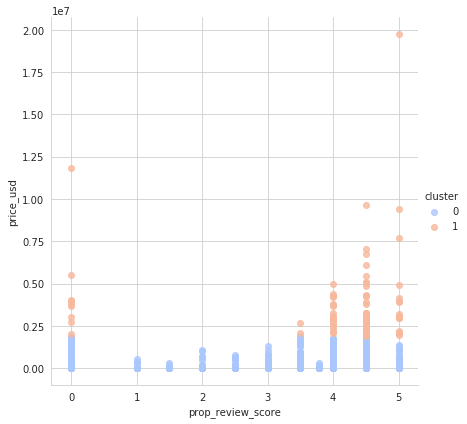

In [39]:
import seaborn as sns
df_analyze['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('prop_review_score','price_usd',data = df_analyze,hue = 'cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [40]:
kmean_4 = KMeans(n_clusters=4)
kmean_4.fit(df_analyze.drop('position',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
print(kmean_4.cluster_centers_)
unique,counts = np.unique(kmean_4.labels_,return_counts=True)
kmean_4.cluster_centers_
print(dict(zip(unique,counts)))

[[ 3.19321733e+00  3.78864405e+00  6.42868750e-01  4.32768009e+00
   1.93974725e+02  2.20198834e-01  7.39096823e+03  2.40493817e+00
   3.78472986e+01  1.97500417e+00  3.55010892e-01  1.11327109e+00
   4.98196744e-01  1.74920450e+00 -9.07246825e-16]
 [ 4.25000000e+00  3.54642857e+00  5.07142857e-01  3.62285714e+00
   2.45694105e+06  4.78571429e-01  1.72719000e+04  2.58571429e+00
   4.19285714e+01  2.46428571e+00  8.57142857e-01  1.12142857e+00
   2.35714286e-01  2.51915857e+00  5.50000000e-01]
 [ 3.16836244e+00  3.76540560e+00  6.24677932e-01  4.30465926e+00
   2.06418146e+02  2.10764678e-01  2.15505554e+04  2.37322172e+00
   3.73723809e+01  1.96987469e+00  3.41659262e-01  1.10802229e+00
   5.02580614e-01  1.71944531e+00 -8.31496669e-16]
 [ 4.42857143e+00  4.07142857e+00  5.71428571e-01  3.97285714e+00
   1.03003990e+07 -2.77555756e-17  1.12352857e+04  2.28571429e+00
   1.28571429e+01  2.71428571e+00  1.42857143e-01  1.00000000e+00
   1.42857143e-01  2.92232857e+00  1.00000000e+00]]
{0:

/opt/conda/lib/python3.6/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


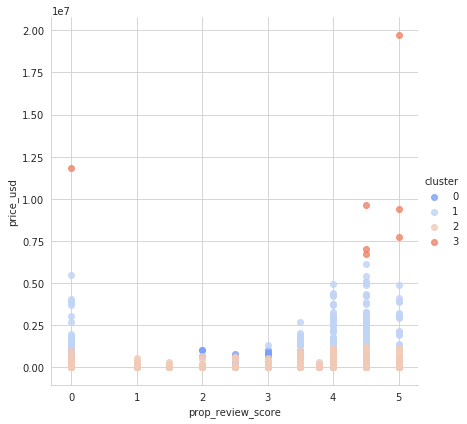

In [43]:
import seaborn as sns
df_analyze['cluster'] = kmean_4.labels_
sns.set_style('whitegrid')
sns.lmplot('prop_review_score','price_usd',data = df_analyze,hue = 'cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [ ]:
kmean_8 = KMeans(n_clusters=16)
kmean_8.fit(df_analyze)
print(kmean_8.cluster_centers_)
unique,counts = np.unique(kmean_8.labels_,return_counts=True)
kmean_8.cluster_centers_
print(dict(zip(unique,counts)))
